## Rates of Change in Popularity for Music Genres

In [1]:
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt

client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

top2013 = pd.read_csv('Top_100_2013.csv')
top2014 = pd.read_csv('billboard2014top100.csv')
top2015 = pd.read_csv('top_100_2015.csv')
top2016 = pd.read_csv('top100_2016.csv')
top2017 = pd.read_csv('top100_2017.csv')



In [2]:
top2017 = top2017.rename(columns={'name':'Title','artists':'Artist(s)'})

In [3]:
top2017.head()

,id,Title,Artist(s),danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [4]:
songs = []
genres = []
listOf100s = [top2013,top2014,top2015,top2016,top2017]

for top100 in listOf100s:
    songs = []
    genres = []
    
    for song in range(0,len(top100['Title'])):

        #I put this in a try just in case the search result yields an error..or any api request yields an error
        try:
            # I search the song name and artist using spotipy, then I limit the number of search results to 1
             track = sp.search(top100['Title'][song] + ' ' + top100['Artist(s)'][song],limit=1)

                # Here I am parsing the json return to get the artists' id so I can look up the artist
             track_id = track['tracks']['items'][0]['artists'][0]['id']
            # This gets the artists' spotify profile, which includes the genres reflected in their music
             artist = sp.artist(track_id)
             genres.append(artist['genres'])
        except:
            genres.append('n/a')
    
    top100['Genre'] = genres

In [5]:
top2013.head()

,№,Title,Artist(s),Genre
0,1,"""Thrift Shop""",Macklemore & Ryan Lewis featuring Wanz,n/a
1,2,"""Blurred Lines""",Robin Thicke featuring T.I. and Pharrell Williams,n/a
2,3,"""Radioactive""",Imagine Dragons,"[modern rock, rock, vegas indie]"
3,4,"""Harlem Shake""",Baauer,"[bass trap, brostep, edm, electro house, elect..."
4,5,"""Can't Hold Us""",Macklemore & Ryan Lewis featuring Ray Dalton,n/a


In [6]:

genre2017 = []
genre2016 = []
genre2015 = []
genre2014 = []
genre2013 = []

allGenres = [genre2013,genre2014,genre2015,genre2016,genre2017]
c = 0
for top100 in listOf100s:
    
    for gen in top100['Genre']:
        if gen != 'n/a':
            for b in gen:
                allGenres[c].append(b)
    c = c + 1

In [7]:
listOfGenre_dfs = []
for genreList in allGenres:
    popCount = 0
    rapCount = 0
    edmCount = 0
    misCount = 0
    for genre in genreList:
        if 'pop' in genre:
            popCount = popCount + 1
        elif('rap' or 'hip hop' or 'trap') in genre:
            rapCount = rapCount + 1
        elif('edm' or 'electro' or 'techno') in genre:
            edmCount = edmCount + 1
        else:
            misCount = misCount + 1

    condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Misc.']
    listOfGenre_dfs.append(pd.DataFrame({"Genre":condensedGenre, "Count":[popCount,rapCount,edmCount,misCount]}))

In [8]:
listOfGenre_dfs[0] = listOfGenre_dfs[0].reset_index()

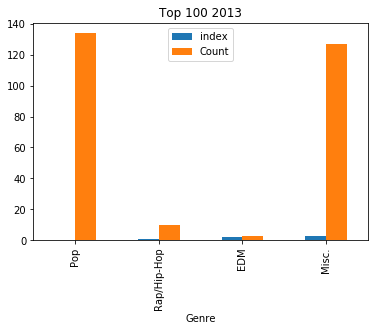

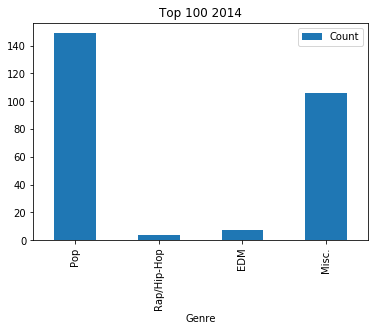

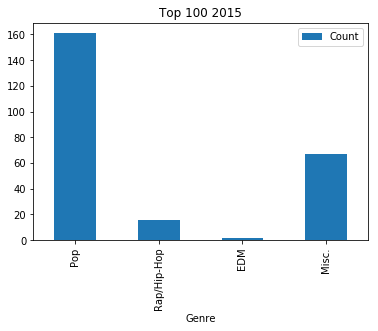

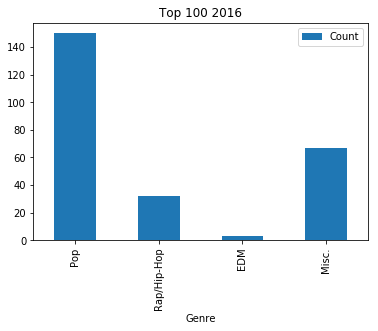

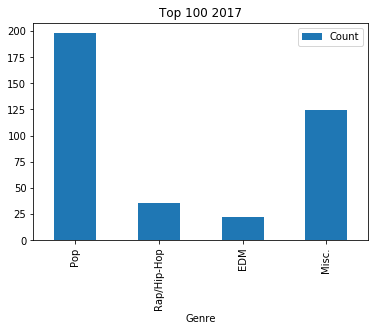

In [9]:
years = ['Top 100 2013','Top 100 2014','Top 100 2015','Top 100 2016','Top 100 2017']
for k in range(0,len(listOfGenre_dfs)):
    listOfGenre_dfs[k] = listOfGenre_dfs[k].set_index('Genre')
    listOfGenre_dfs[k].plot.bar(title=years[k])
    listOfGenre_dfs[k] = listOfGenre_dfs[k].reset_index()

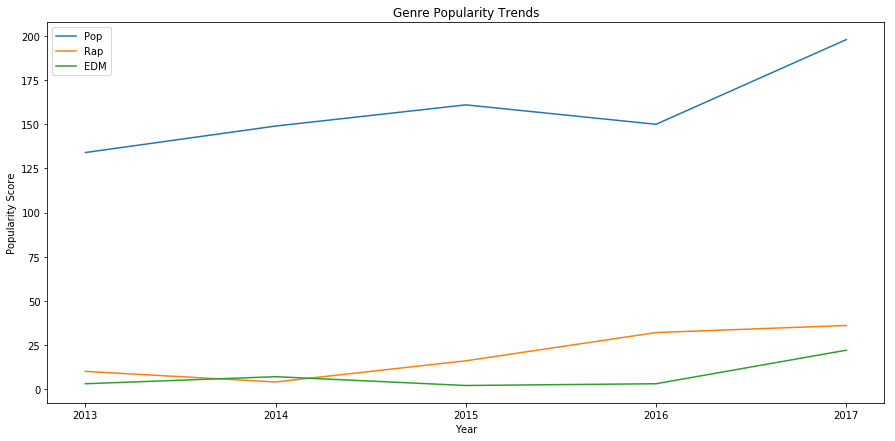

In [16]:
popTrends = []
rapTrends = []
edmTrends = []

for df in listOfGenre_dfs:
    popTrends.append(df['Count'][0])
    rapTrends.append(df['Count'][1])
    edmTrends.append(df['Count'][2])
xlabels = ['2013','2014','2015','2016','2017']

plt.figure(figsize=(15,7))
plt.plot(xlabels,popTrends,label='Pop')
plt.plot(xlabels,rapTrends,label='Rap')
plt.plot(xlabels,edmTrends,label='EDM')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Popularity Score')
plt.title('Genre Popularity Trends')
plt.savefig('musicTrends.png')